In [1]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import NS_solver as ns 

In [2]:
!dolfin-convert data/mesh/bifurcation.msh data/mesh/bifurcation.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 11100 vertices
Found all vertices
Expecting 21006 cells
Found all cells
Conversion done


In [3]:
#Load mesh
meshfile = "data/mesh/bifurcation" 
mesh = Mesh(meshfile + ".xml")
bounds = MeshFunction("size_t", mesh, meshfile + "_facet_region.xml")


In [4]:
n = FacetNormal(mesh)
h = mesh.hmin()

In [5]:
u,p = ns.solve_stokes(bounds,mesh)

Solving linear variational problem.


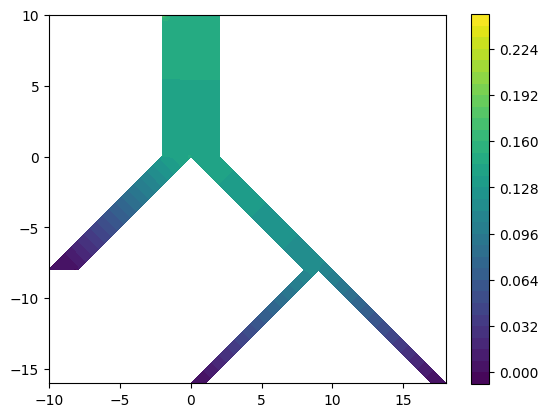

In [6]:
sol = plot(p)
plt.colorbar(sol)

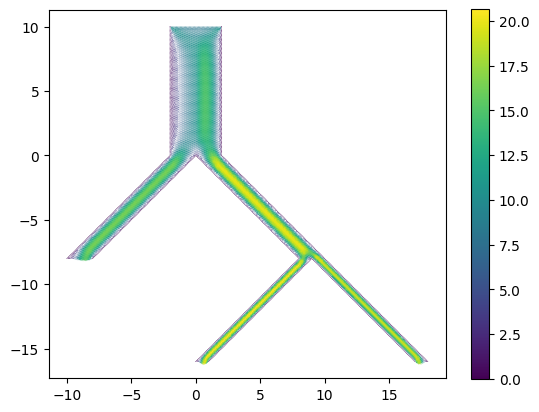

In [7]:
sol = plot(u)
plt.colorbar(sol)

In [8]:
rename_boundaries = MeshFunction("size_t", mesh,1)
rename_boundaries.set_all(0)
rename_boundaries.array()[bounds.array()==5] = 1 
rename_boundaries.array()[bounds.array()==6] = 2
rename_boundaries.array()[bounds.array()==7] = 3
rename_boundaries.array()[bounds.array()==8] = 4
ds1 = Measure("dS",domain=mesh, subdomain_data=rename_boundaries)

In [11]:
flux = dot(u, n('+'))*ds1(2)
total_flux = assemble(flux)
total_flux

18.85790991917721